In [2]:
import numpy as np 
import pandas as pd
import matplotlib as mpl 
from matplotlib import pyplot as plt
from matplotlib.pyplot import get_cmap
from matplotlib.colors import LogNorm
import scicolor

def generate_colors(colormap_name, N):
    cmap = get_cmap(colormap_name)
    return [cmap(i / (N - 1)) for i in range(N)]

def hex2rgb(hex):
    rbg = tuple(int(hex[i:i+2], 16) for i in (0, 2, 4))
    return tuple([c/255 for c in rbg])


mpl.rcParams['mathtext.fontset'] = 'stix'  # or 'dejavusans', 'cm', 'custom'
mpl.rcParams['font.family'] = 'STIXGeneral'  # Matches STIX math font
fontsize = 12
# set tick font size
mpl.rcParams['xtick.labelsize'] = fontsize
mpl.rcParams['ytick.labelsize'] = fontsize


max Knauer: 2.0178754546016693 1.6541033515171124


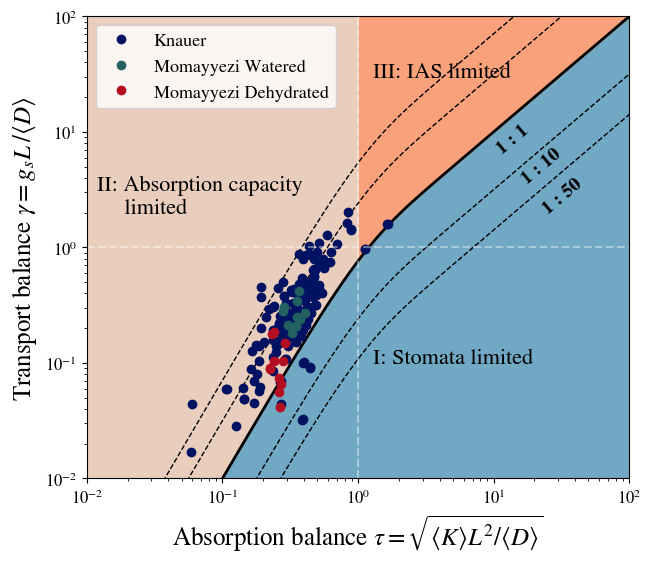

In [6]:
fig = plt.figure(figsize=(7, 6))
zeta_ = 0.1
xmin, xmax = 0.01, 100

taus = np.exp(np.linspace(np.log(xmin), np.log(xmax), 400))
borders = lambda taus, sigma: sigma*taus*np.tanh(taus)

# COLORS
# I : stomata
colorI = hex2rgb('71A8C4')      #hex2rgb('67a9b9')       #hex2rgb('00b9bd') #'teal' 
# II : absorption capacity
colorII = hex2rgb('EACEBD')      #hex2rgb('629076')      #hex2rgb('004853') #'darkgoldenrod'
# III : IAS
colorIII = hex2rgb('F8A17B')     #hex2rgb('dd7308')     #hex2rgb('f63700') #'seagreen'
#
point_colors = [hex2rgb('001261'), hex2rgb('226061'), hex2rgb('B40F20')]

# shading
plt.fill_between(taus, borders(taus, 1), xmin, color=colorI)
plt.fill_between(taus[taus <= 1], xmax, borders(taus[taus <= 1], 1), color=colorII)
plt.fill_between(taus[taus >= 1], xmax, borders(taus[taus >= 1], 1), color=colorIII)
# lines
plt.plot(taus, borders(taus, 1), color='black', linestyle='-', linewidth=2)
plt.plot(taus, borders(taus, np.sqrt(50)), color='black', linestyle='--', linewidth=1)
plt.plot(taus, borders(taus, np.sqrt(10)), color='black', linestyle='--', linewidth=1)
plt.plot(taus, borders(taus, 1/np.sqrt(10)), color='black', linestyle='--', linewidth=1)
plt.plot(taus, borders(taus, 1/np.sqrt(50)), color='black', linestyle='--', linewidth=1)
#
# annotate
plt.text(10, 6.5, '1 : 1', fontsize=14, fontweight='bold', color='black', rotation=40)
plt.text(15.2, 3.6, '1 : 10', fontsize=14, fontweight='bold', color='black', rotation=40)
plt.text(22, 2, '1 : 50', fontsize=14, fontweight='bold', color='black', rotation=40)

# label the regions
plt.text(1.3, 0.1, r'I: Stomata limited', fontsize=16, color='black')
plt.text(0.012, 2, r'II: Absorption capacity'+'\n     limited', fontsize=16, color='black')
plt.text(1.3, 30, r'III: IAS limited', fontsize=16, color='black')

# load dfKnauer and dfMomayyezi to plot the data points
dfKnauer = pd.read_csv('data/Knauer2022_all_hypostomatous.csv', sep=';', decimal=',')
dfMomayyeziW = pd.read_csv('data/Momayyezi_watered.csv')
dfMomayyeziDH = pd.read_csv('data/Momayyezi_dehydrated.csv')

print('max Knauer:', dfKnauer['gamma'].max(), dfKnauer['tau'].max())

#'7294D4'
# plot data points 
for df, color, label in zip([dfKnauer, dfMomayyeziW, dfMomayyeziDH], point_colors, ['Knauer', 'Momayyezi Watered', 'Momayyezi Dehydrated']):
    plt.plot(df['tau'], df['gamma'], 'o', color=color, label=label)
    # plt.errorbar(df['tau'], df['gamma'], xerr=[df['dtau_low'], df['dtau_high']], yerr=[df['dgamma_low'], df['dgamma_high']], fmt='o', color=color, label=label, alpha=0.4)

# plt.plot(dfKnauer['tau'], dfKnauer['gamma'], 'o', color='black', label='Knauer')

plt.xlabel(r'Absorption balance $\tau = \sqrt{\langle K \rangle L^2 / \langle D \rangle}$', fontsize=18)
plt.ylabel(r'Transport balance $\gamma = g_s L \;/ \langle D \rangle$', fontsize=18)
plt.plot([1, 1], [xmin, xmax], color='white', linestyle='--', alpha=0.4)
plt.plot([xmin, xmax], [1, 1],  color='white', linestyle='--', alpha=0.4)
#plt.plot([1, 1] ,[1.3, 100], color='forestgreen')
plt.xscale('log')
plt.yscale('log')
plt.xlim(xmin, xmax)
plt.ylim(xmin, xmax)

plt.legend(fontsize=13)

plt.savefig('figs/2D_phase_diagram.svg')
plt.show()


['#001261',
 '#02236C',
 '#023376',
 '#034481',
 '#06568C',
 '#156798',
 '#307DA6',
 '#4E92B4',
 '#71A8C4',
 '#94BED2',
 '#B3D1DF',
 '#D5E3E9']

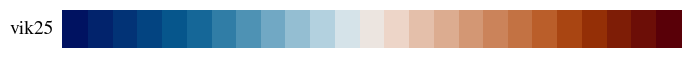

In [4]:
map = 'vik25'
scicolor.plot_cmaps([map])
scicolor.get_cmap(map).colors

['#001261',
 '#02236C',
 '#023376',
 '#034481',
 '#06568C',
 '#156798',
 '#307DA6',
 '#4E92B4',
 '#71A8C4',
 '#94BED2',
 '#B3D1DF',
 '#D5E3E9']